Serie de Fourier
========================================



## Introdução



No dia 25/04, na aula do pr. Martínez, aprendemos a fórmula da série de Fourier para uma função periódica. A série em sí se escreve da seguinte forma:<br>
<br>
$S(x) = \frac{A_0}{2} + \sum\limits_{n = 1}^{\infty}A_n\cdot sen(nx) + B_n\cdot cos(nx)$
<br>
<br>
Para encontrar os coeficientes $A_n$ e $B_n$ da serie que aproxima uma função f(x), usamos a formula:<br>
<br>
$A_0 = \frac{1}{\pi}\int_0^{2\pi} f(x) dx$<br>
<br>
$A_n = \frac{1}{\pi}\int_0^{2\pi} f(x)\cdot sen(nx)dx$<br>
<br>
$B_n = \frac{1}{\pi}\int_0^{2\pi} f(x)\cdot cos(nx)dx$<br>
<br>
Alternativamente, podemos usar um algoritmo genético para encontrar quais $A_n$s e $B_n$s minimizam o erro da nossa aproximação. Como exemplo, vamos usar uma reprodução do desenho feito pelo professor Martínez no quadro.

## Objetivo

Encontrar um polinômio de Fourier que aproxima a função correspondente ao desenho feito no quadro pelo professor Martínez, no dia 25/04.

## Importações



In [1]:
from funcoes import populacao_inicial_serie
from funcoes import funcao_objetivo_pop_serie
from funcoes import selecao_torneio_min
from funcoes import cruzamento_serie as funcao_cruzamento
from funcoes import mutacao_serie as funcao_mutacao
from funcoes import serie_fourier
import matplotlib.pyplot as plt
import random as rd
import numpy as np
from scipy import integrate
from constantes import DESENHO_MARTINEZ
plt.style.use('seaborn-bright')

## Códigos e discussão



Primeiramente, vamos plotar o desenho:

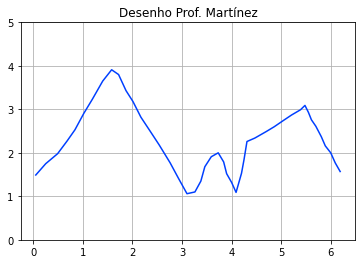

In [2]:
x = []
y = []
for i in DESENHO_MARTINEZ:
    x.append(i[0])
    y.append(i[1])
x = np.array(x)
y = np.array(y)
fig, ax = plt.subplots(1,1)
ax.plot(x,y)
ax.set_ylim(0,5)
ax.set_title("Desenho Prof. Martínez")
plt.grid('--')
plt.savefig('desenho.png',dpi = 200)

Em seguida, usamos a fórmula para encontrar o polinômio de Fourier e comparar com o desenho:

In [3]:
ORDEM = 10
As = []
Bs = []
for i in range(ORDEM+1):
    y1 = y*np.cos(i*x)/np.pi
    A = integrate.simpson(y1, x)
    print(f'A{i} = {A}')
    y2 = y*np.sin(i*x)/np.pi
    B = integrate.simpson(y2,x)
    print(f'B{i} = {B}')
    As.append(A)
    Bs.append(B)
y_serie_1 = np.zeros(len(x)) + As[0]/2
for i in range(1, len(As)):
    y_serie_1 = y_serie_1 + As[i]*np.cos(i*x) + Bs[i]*np.sin(i*x)

A0 = 4.600680216010023
B0 = 0.0
A1 = 0.20507409728169762
B1 = 0.3909525321186145
A2 = -0.8637663231988554
B2 = -0.2823152298704438
A3 = -0.1909785990276665
B3 = -0.2389600353268797
A4 = -0.112493635820859
B4 = 0.08060647938813228
A5 = -0.059426099955172444
B5 = 0.009491346495906994
A6 = -0.2276695408673958
B6 = 0.08607844976180694
A7 = 0.04436430535533027
B7 = 0.033083805454010504
A8 = -0.07590587840205701
B8 = -0.01601753234367216
A9 = 0.000365519873881592
B9 = 0.11774539480060234
A10 = -0.11521914106625183
B10 = -0.025962994024992206


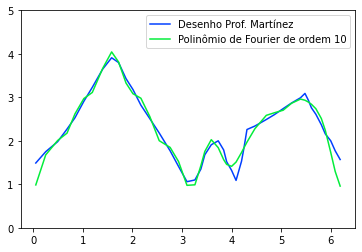

In [4]:
fig, ax = plt.subplots(1,1)
ax.plot(x,y, label = 'Desenho Prof. Martínez')
ax.plot(x, y_serie_1, label = f"Polinômio de Fourier de ordem {ORDEM}")
ax.set_ylim(0,5)
ax.legend()
plt.savefig(f'ordem{ORDEM}.png', dpi = 200)

Agora vamos fazer o mesmo, porém, ao invés de utilizar a fórmula, vamos utilizar um algoritmo genético:

In [5]:
# CONSTANTES

# relacionadas à busca
TAMANHO_POP = 50
CHANCE_CRUZAMENTO = 0.5
CHANCE_MUTACAO = 0.05
NUM_COMBATENTES_NO_TORNEIO = 3
NUM_GERACOES = 5000

#relacionados ao problema
#ORDEM = 2
DESENHO = DESENHO_MARTINEZ

# para corrigir o fato de que os coeficientes começam pelo 0
ORDEM = ORDEM + 1

In [6]:
# funções locais (para não ter que colocar as variaveis locais no script
def cria_populacao_inicial(tamanho, ordem):
    return populacao_inicial_serie(tamanho, ORDEM)

def funcao_objetivo_pop(populacao):
    return funcao_objetivo_pop_serie(populacao, DESENHO)

def funcao_selecao(populacao, fitness):
    return selecao_torneio_min(populacao, fitness, NUM_COMBATENTES_NO_TORNEIO)

In [7]:
# Busca por algoritmo genético

populacao = cria_populacao_inicial(TAMANHO_POP, ORDEM)

melhor_fitness_ja_visto = float("inf")  # é assim que escrevemos infinito em python

lista_melhor_fitness = []

for n in range(NUM_GERACOES):
    
    # Seleção
    fitness = funcao_objetivo_pop(populacao)
    populacao = funcao_selecao(populacao, fitness)
    
    # Cruzamento
    pais = populacao[0::2]
    maes = populacao[1::2]
    
    contador = 0
    
    for pai, mae in zip(pais, maes):
        if rd.random() <= CHANCE_CRUZAMENTO:
            filho1, filho2 = funcao_cruzamento(pai, mae)
            populacao[contador] = filho1
            populacao[contador + 1] = filho2
        
        contador = contador + 2   
        
    # Mutação
    for n in range(len(populacao)):
        if rd.random() <= CHANCE_MUTACAO:
            individuo = populacao[n]
            populacao[n] = funcao_mutacao(individuo)            
            
    # melhor individuo já visto até agora
    fitness = funcao_objetivo_pop(populacao)
    menor_fitness = min(fitness)
    if menor_fitness < melhor_fitness_ja_visto:        
        posicao = fitness.index(menor_fitness)
        melhor_individuo_ja_visto = populacao[posicao]
        melhor_fitness_ja_visto = menor_fitness    
    lista_melhor_fitness.append(melhor_fitness_ja_visto)
print('Melhor indivíduo já visto:')
print()
for i in range(len(melhor_individuo_ja_visto[0])):
    print(f"A{i} = {melhor_individuo_ja_visto[0][i]}")
    print(f"B{i} = {melhor_individuo_ja_visto[1][i]}")

Melhor indivíduo já visto:

A0 = 4.677396959521856
B0 = 0
A1 = 0.2781269789522556
B1 = 0.3659070655156036
A2 = -0.7894989932153624
B2 = -0.2794351766049896
A3 = -0.11010806600501244
B3 = 3.2858560020971073
A4 = -0.03338317525833023
B4 = 0.0787638811930611
A5 = 0.01298526288305446
B5 = -0.002584040710953417
A6 = -0.15551324982690495
B6 = 0.09198088478782918
A7 = 0.13773695938643193
B7 = 0.01833300817050354
A8 = -0.044462929629885295
B8 = -0.07413974947593083
A9 = -0.004732704112613284
B9 = 0.09134074512097179
A10 = 0.03101761699323724
B10 = -0.020112034050868033


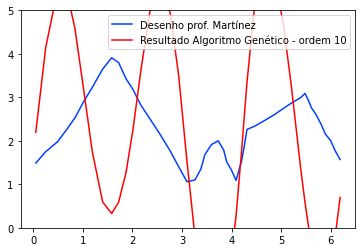

In [8]:
y_serie_ag = []
for i in x:
    y_serie_ag.append(serie_fourier(i, melhor_individuo_ja_visto))
fig, ax = plt.subplots(1,1)
ax.plot(x,y, label = "Desenho prof. Martínez")
ax.plot(x, y_serie_ag, c = 'r', label = f"Resultado Algoritmo Genético - ordem {ORDEM -1}")
ax.set_ylim(0,5)
ax.legend()
plt.savefig(f'ag_ordem{ORDEM}.png', dpi = 200)

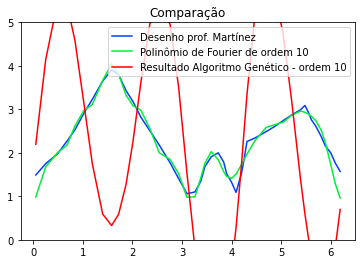

In [9]:
y_serie_ag = []
for i in x:
    y_serie_ag.append(serie_fourier(i, melhor_individuo_ja_visto))
fig, ax = plt.subplots(1,1)
ax.set_title('Comparação')
ax.plot(x,y, label = "Desenho prof. Martínez")
ax.plot(x, y_serie_1, label = f"Polinômio de Fourier de ordem {ORDEM-1}")
ax.plot(x, y_serie_ag, c = 'r', label = f"Resultado Algoritmo Genético - ordem {ORDEM -1}")
ax.set_ylim(0,5)
ax.legend()
plt.savefig(f'com_ordem{ORDEM}.png', dpi = 200)

## Conclusão



Concluo que o algoritmo génético funcionou e conseguiu aproximar muito bem o desenho. No entanto, ao rodar o código várias vezes, percebi que nem sempre ele dá certo. As vezes ele falha completamente e chega em uma função que não se parece nem um pouco com o desenho, e as vezes ele chega muito próximo. Além disso, percebi que, começando com um polinômio de ordem baixa e aumentando a ordem, observa-se o resultado esperado, que é a aproximação melhorando. No entanto, acima de um certo ponto ($\pm$ ordem 7) a aproximação começa a piorar muito. Provavelmente isso se dá pois o espaço de busca começa a ficar muito grande, e consequentemente fica mais difícil para o algoritmo encontrar mínimos em um espaço tão grande.